# INNOMATICS RESEARCH LABS

## NAME : ALMAS BANU

## TASK : KNN Implementation from Scratch.

### Dataset : diamonds.csv

#### ABOUT DATASET :

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 
    
    $\cdot $ price : price in US dollars (\$326--\$18,823)
    
    $\cdot $ carat : weight of the diamond (0.2--5.01)
    
    $\cdot $ cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    
    $\cdot $ color : diamond colour, from J (worst) to D (best)
    
    $\cdot $ clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    
    $\cdot $ x : length in mm (0--10.74)
    
    $\cdot $ y : width in mm (0--58.9)
    
    $\cdot $ z : depth in mm (0--31.8)
    
    $\cdot $ depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    
    $\cdot $ table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 




### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Loading the data 

In [2]:
df = pd.read_csv("dataset/diamonds.csv")

#### Lets Explore the given dataset

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Number of rows and columns using shape function

In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### Lets divide dataset as numerical and categorical columns.

#### Numerical columns

In [7]:
df_num = df.select_dtypes(['int64','float64'])
num_cols = df_num.columns
print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


#### Categorical columns

In [8]:
df_cat = df.select_dtypes(['object'])
cat_cols = df_cat.columns
print('Categorical Columns : {}'.format(list(cat_cols)))

Categorical Columns : ['cut', 'color', 'clarity']


#### Summary statistics of diamonds.csv

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Observation : 'x','y','z' columns have min as 0.But in reality we can't have a diamond of length 0 so I am dropping the rows which have 0 in these columns.

In [10]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.describe(include='object')

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


#### Are there any null values in given dataset. Lets check !!

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Observation : No null values

### Exploratory Data Analysis (Visualization is used)

### Univariate Analysis

#### Function to find the distribution of numerical columns

In [14]:
def vis(col):
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    plt.axvline(df[col].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[col])
    plt.axvline(df[col].mean(), color="black", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[col].skew()
    kurt = df[col].kurt()
    print('Skewness of column {} is :{}'.format(col,round(skew,3)))
    print('Kurtosis of column {} is :{}'.format(col,round(kurt,3)))

### Distribution of  'price' column

Skewness of column price is :1.618
Kurtosis of column price is :2.178


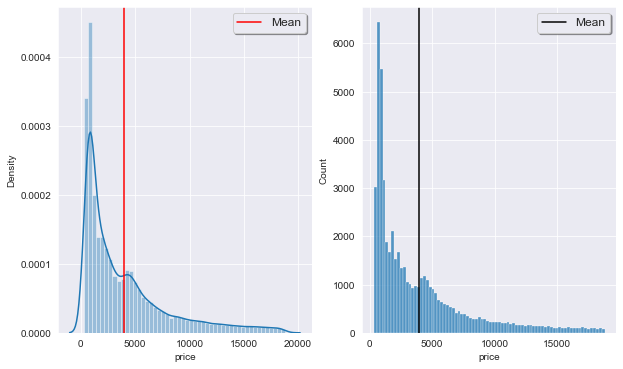

In [15]:
vis('price')

### Distribution of 'table' column

Skewness of column table is :0.797
Kurtosis of column table is :2.802


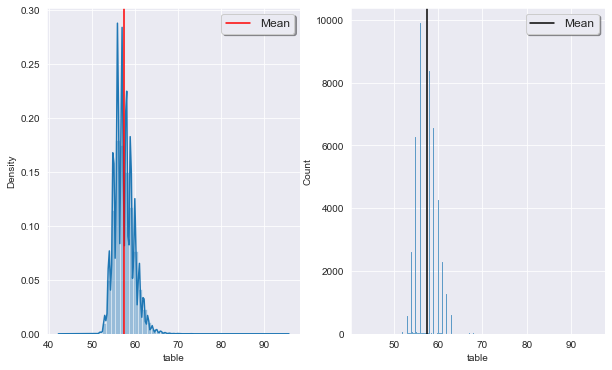

In [16]:
vis('table')

### Distribution of 'carat' column

Skewness of column carat is :1.116
Kurtosis of column carat is :1.255


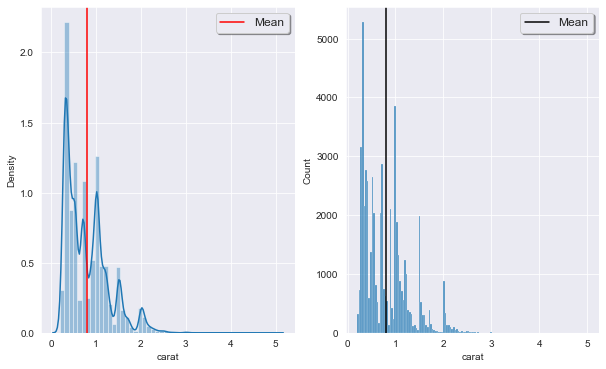

In [17]:
vis('carat')

### Distribution of 'depth' column

Skewness of column depth is :-0.082
Kurtosis of column depth is :5.746


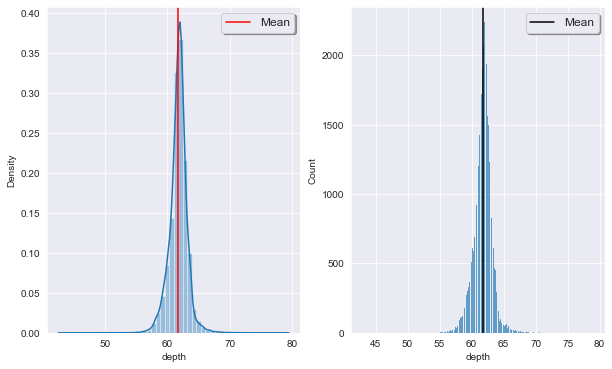

In [18]:
vis('depth')

### Distribtion of 'x' column

Skewness of column x is :0.398
Kurtosis of column x is :-0.704


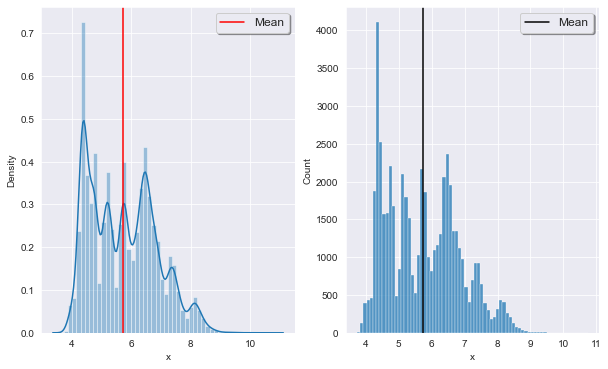

In [19]:
vis('x')

### Distribution of 'y' column

Skewness of column y is :2.462
Kurtosis of column y is :91.826


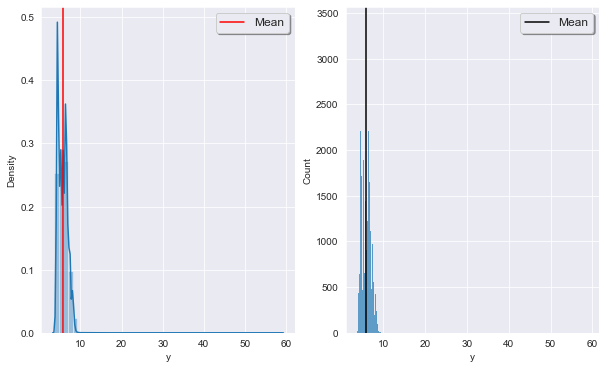

In [20]:
vis('y')

### Distribution of 'z' column

Skewness of column z is :1.585
Kurtosis of column z is :47.765


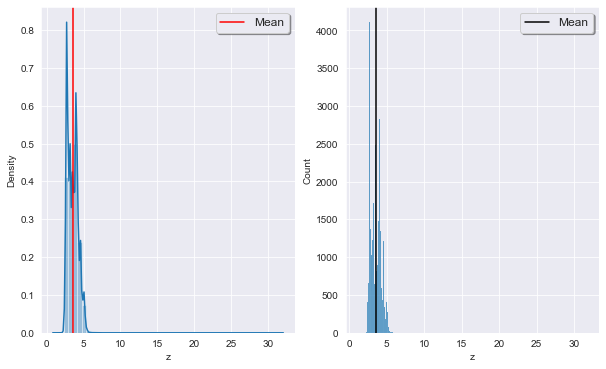

In [21]:
vis('z')

### Categorical columns

#### Countplot of 'cut' column 

In [22]:
df['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53920, dtype: object

In [23]:
cut_unique = df['cut'].unique()
print(cut_unique)
print("Number of unique values : ",len(cut_unique)) 

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Number of unique values :  5


In [24]:
cut_count = df['cut'].value_counts()
cut_count

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

### Countplot using sns library for visualization

Text(0, 0.5, 'Count')

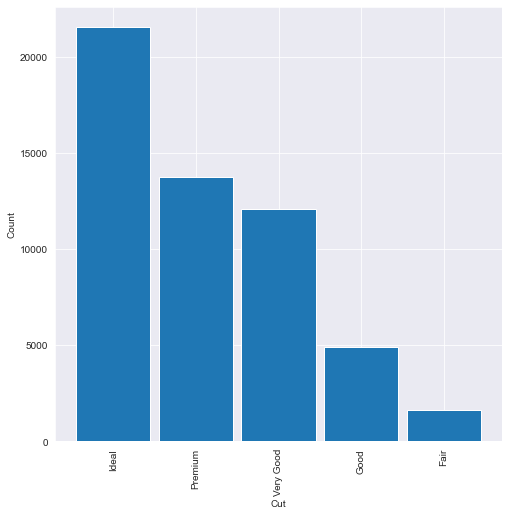

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
cut_count.plot(kind='bar' , width=0.9)
plt.xlabel('Cut')
plt.ylabel('Count')

#### Ideal has more counts

#### Countplot of 'clarity' column

In [26]:
df['clarity']

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53920, dtype: object

In [27]:
clarity_u = df['clarity'].unique()
print(clarity_u)
print("Count of unique values : ",len(clarity_u)) 

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Count of unique values :  8


In [28]:
clarity_c = df['clarity'].value_counts()
clarity_c

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

Text(0, 0.5, 'Count')

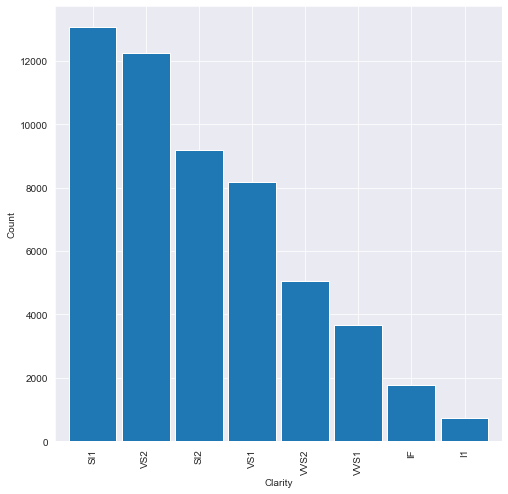

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
clarity_c.plot(kind='bar' , width=0.9)
plt.xlabel('Clarity')
plt.ylabel('Count')

#### SI1 has highest count

#### Countplot of 'color' column

In [30]:
df['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53920, dtype: object

In [31]:
color_u = df['color'].unique()
print(color_u)
print("Count of unique values : ",len(color_u))

['E' 'I' 'J' 'H' 'F' 'G' 'D']
Count of unique values :  7


In [32]:
color_c = df['color'].value_counts()
color_c

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Text(0, 0.5, 'Count')

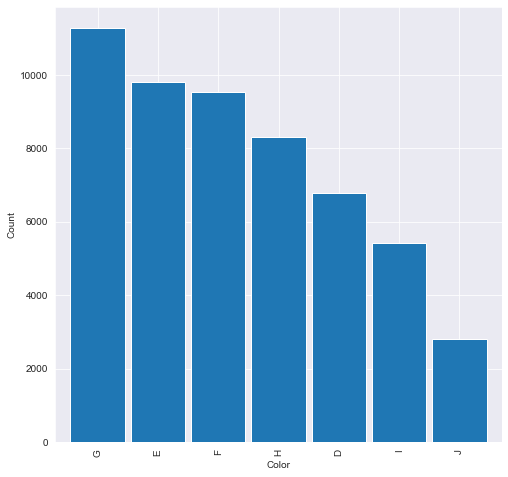

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
color_c.plot(kind='bar' , width=0.9)
plt.xlabel('Color')
plt.ylabel('Count')

#### G has highest count

### Bivariate Analysis

In [38]:
# using corr() function
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


#### HEATMAP

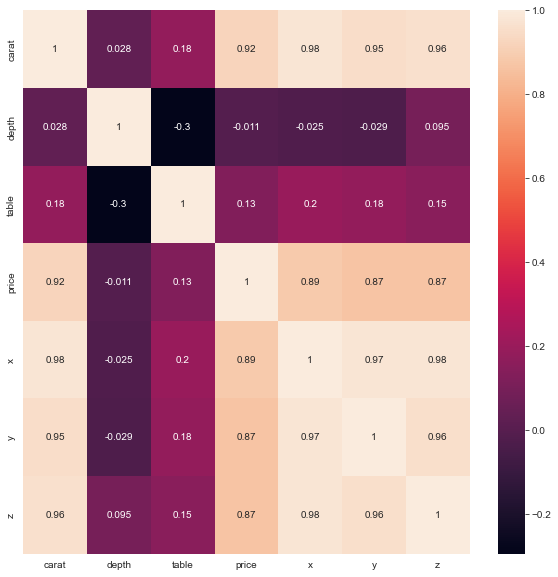

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Observation : 'x','y','z' are correlated with 'price' column

#### Pairplot of all columns

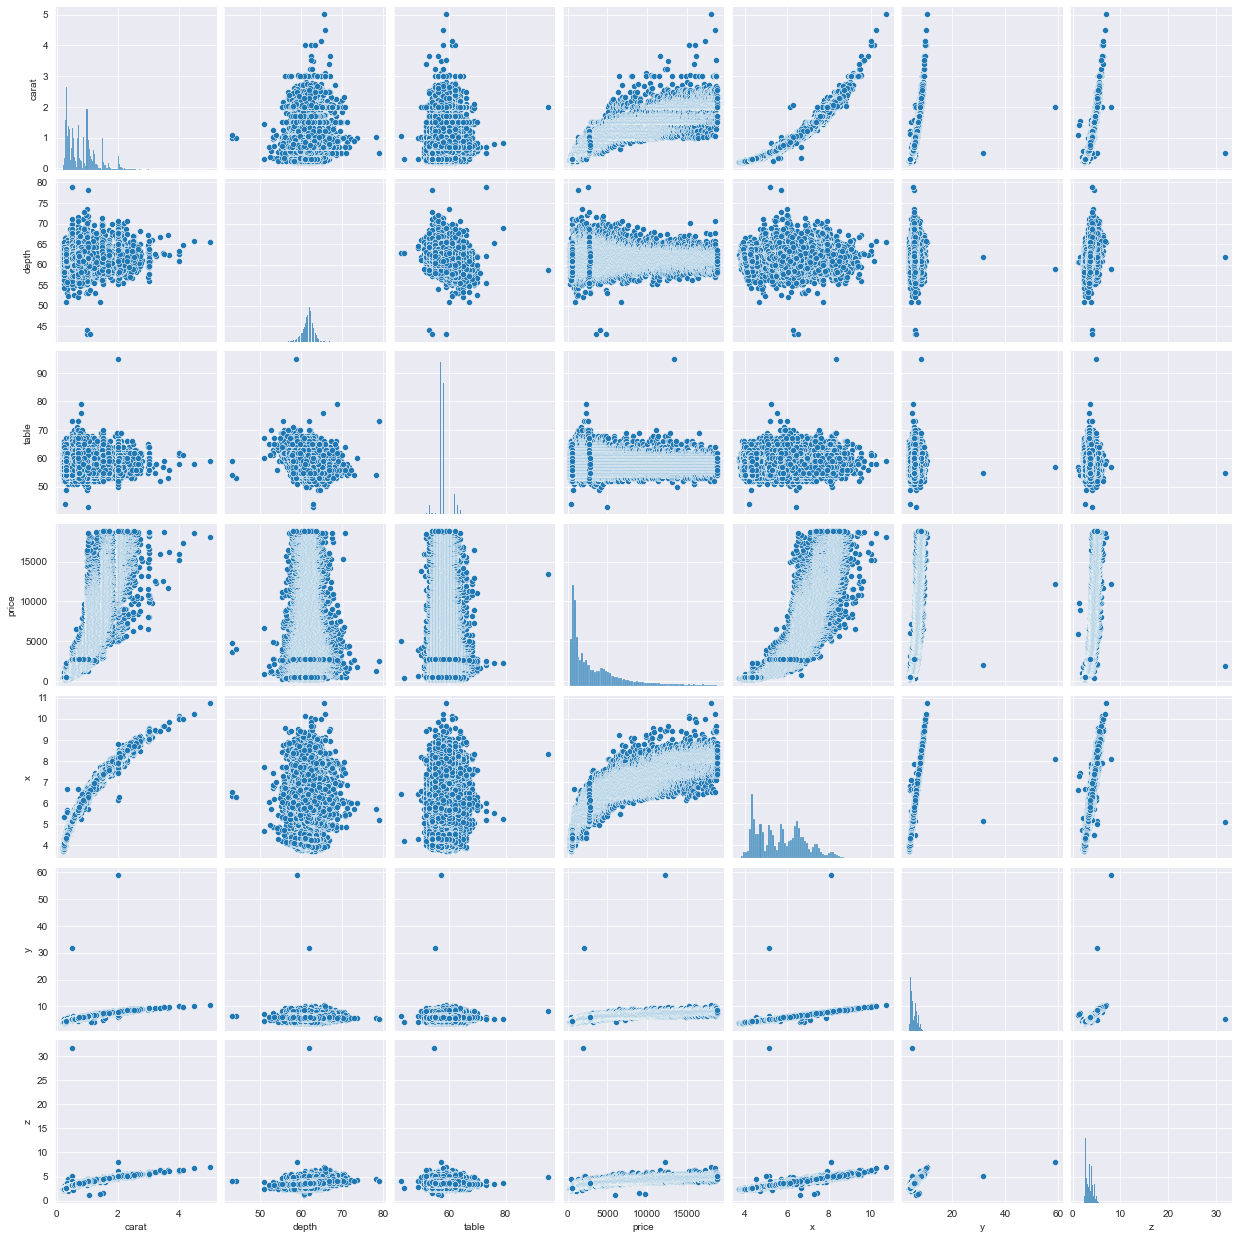

In [40]:
sns.pairplot(df)

### Number of Outliers in Each numeric column

In [41]:
numeric_data = df.select_dtypes(['int64','float64']).columns
# Creating a new dataframe
outliers = pd.DataFrame(columns=['Feature','Outliers','Percentage']) 
    
for column in list(numeric_data):  
    # first quartile
    q1 = df[column].quantile(0.25)
    # third quartile
    q3 = df[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
    outliers = outliers.append({'Feature':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Outliers,Percentage
0,carat,1883,3.492211
1,depth,2543,4.716246
2,table,604,1.120178
3,price,3532,6.550445
4,x,24,0.04451
5,y,22,0.040801
6,z,29,0.053783


#### Treating Outliers

<AxesSubplot:xlabel='table'>

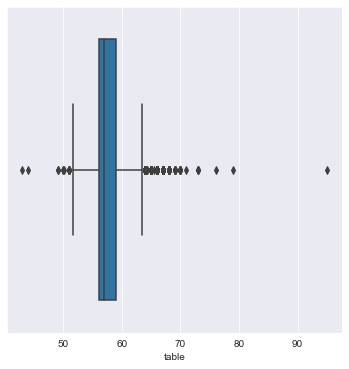

In [42]:
# For 'table' column
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.boxplot(df['table'])

<AxesSubplot:xlabel='depth'>

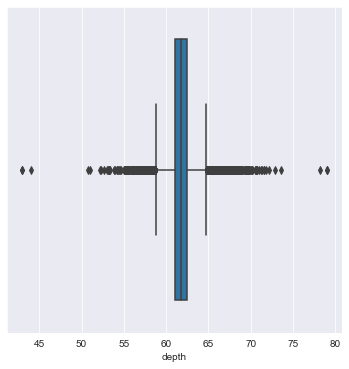

In [43]:
# For 'depth' column
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.boxplot(df['depth'])

<AxesSubplot:xlabel='x'>

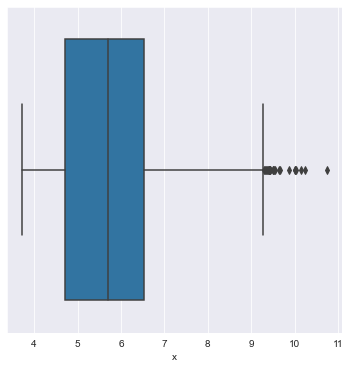

In [44]:
# For 'x' column
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.boxplot(df['x'])

<AxesSubplot:xlabel='y'>

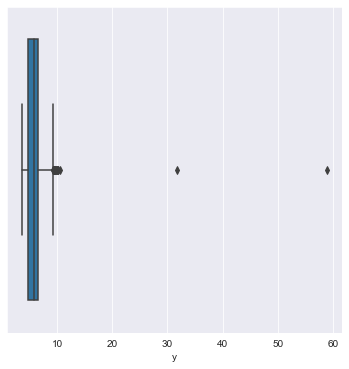

In [45]:
# For 'y' column
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.boxplot(df['y'])

<AxesSubplot:xlabel='z'>

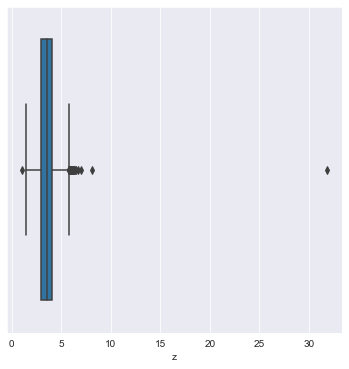

In [46]:
# For 'z' column
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.boxplot(df['z'])

#### Outliers are less in number so we can drop them.

In [47]:
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["z"]<30)&(df["z"]>2)]

#### carat,price values which act as outliers can't be removed.

### Handling Categorical Data and Numerical Data

#### I am applying One-Hot Encoding for Categorical Column

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [49]:
categories = df.select_dtypes('object')
cat_df = pd.DataFrame(encoder.fit_transform(categories), 
                      columns=encoder.get_feature_names(categories.columns))
cat_df.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
cat_df.shape

(53907, 17)

#### Normalizing the data 

#### MinMaxScalar method

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
nums = df.select_dtypes(include=['int64', 'float64'])   
num_df = pd.DataFrame(scaler.fit_transform(nums),columns = nums.columns)
num_df.head()

,carat,depth,table,price,x,y,z
0,0.006237,0.469298,0.333333,0.000000,0.031384,0.043732,0.075203
1,0.002079,0.394737,0.500000,0.000000,0.022825,0.023324,0.050813
2,0.006237,0.267544,0.611111,0.000054,0.045649,0.056851,0.050813
3,0.018711,0.508772,0.416667,0.000433,0.067047,0.080175,0.115854
4,0.022869,0.548246,0.416667,0.000487,0.087019,0.097668,0.140244


#### Now,the new/final data after doing EDA and Normalization.

In [53]:
new_df = pd.concat([num_df,cat_df],axis=1)
new_df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.469298,0.333333,0.000000,0.031384,0.043732,0.075203,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.394737,0.500000,0.000000,0.022825,0.023324,0.050813,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.267544,0.611111,0.000054,0.045649,0.056851,0.050813,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.508772,0.416667,0.000433,0.067047,0.080175,0.115854,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.548246,0.416667,0.000487,0.087019,0.097668,0.140244,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
new_df.shape

(53907, 24)

#### Summary statistics of new_df

In [55]:
new_df.describe()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,...,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.124247,0.480252,0.401554,0.194874,0.285515,0.299314,0.300699,0.090934,0.399633,0.255607,...,0.153895,0.100544,0.052071,0.033205,0.242251,0.170367,0.151502,0.227243,0.067783,0.093977
std,0.098496,0.062286,0.061838,0.215559,0.159684,0.161990,0.140535,0.287518,0.489827,0.436206,...,0.360851,0.300726,0.222173,0.179174,0.428449,0.375959,0.358541,0.419055,0.251376,0.291799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.447368,0.361111,0.033681,0.139800,0.151603,0.172764,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103950,0.482456,0.388889,0.112180,0.281027,0.295918,0.298780,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174636,0.513158,0.444444,0.270098,0.400856,0.416910,0.402439,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### SPLITTING THE COLUMNS

In [56]:
original = new_df.drop(["price"],axis =1)
target = new_df["price"]

### Splitting the Data into Train and Test Data (75:25 split)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(original, target, test_size = 1/4, random_state = 0)

### Building KNN(K-Nearest Neighbor) Algorithm from Scratch

In [58]:
class my_KNN:
    def __init__(self, K):
        self.K = K
        
    def fit(self, X, Y):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        
    def knn_pred(self, X):
        X = np.asarray(X)
        ans = []
        for i in X:
            eudis = np.sqrt(np.sum((i-self.X)**2,axis=1))
            index = eudis.argsort()
            index = index[:self.K]
            ans.append(np.mean(self.Y[index]))
        return np.array(ans)

In [59]:
KNN_Model = my_KNN(K=3)
KNN_Model.fit(X_train,Y_train)
y_pred = KNN_Model.knn_pred(X_test)

### sklearn KNN Model

In [60]:
from sklearn.neighbors import KNeighborsRegressor
Real_KNN = KNeighborsRegressor( n_neighbors = 3 )
Real_KNN.fit( X_train, Y_train )
y_pred_builtin =  Real_KNN.predict( X_test )

### KNN for K = 3

In [61]:
print( "Predicted values by my KNN model     :  ", np.round( y_pred[:3], 3 ) )       
print( "Predicted values by sklearn KNN model :  ", np.round( y_pred_builtin[:3], 3 ) )

Predicted values by my KNN model     :   [0.232 0.073 0.107]
Predicted values by sklearn KNN model :   [0.232 0.073 0.107]


### KNN for K = 5

In [62]:
KNN_Model = my_KNN(K = 5)
KNN_Model.fit(X_train,Y_train)
y_pred = KNN_Model.knn_pred(X_test)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
Real_KNN = KNeighborsRegressor( n_neighbors = 5 )
Real_KNN.fit( X_train, Y_train )
y_pred_builtin =  Real_KNN.predict( X_test )

In [64]:
print( "Predicted values by my KNN model     :  ", np.round( y_pred[:5], 2 ) )       
print( "Predicted values by sklearn KNN model :  ", np.round( y_pred_builtin[:5], 2 ) )

Predicted values by my KNN model     :   [0.23 0.07 0.11 0.15 0.13]
Predicted values by sklearn KNN model :   [0.23 0.07 0.11 0.15 0.13]


## THANK YOU 